In [81]:

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor


In [18]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
data=data[['MSSubClass','MSZoning','LotArea','LotShape','LandContour','Utilities','LotConfig','Condition1','BldgType','OverallCond','YearRemodAdd',]]

In [21]:
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,Condition1,BldgType,OverallCond,YearRemodAdd,MasVnrArea
0,60,RL,8450,Reg,Lvl,AllPub,Inside,Norm,1Fam,5,2003,196.0
1,20,RL,9600,Reg,Lvl,AllPub,FR2,Feedr,1Fam,8,1976,0.0
2,60,RL,11250,IR1,Lvl,AllPub,Inside,Norm,1Fam,5,2002,162.0
3,70,RL,9550,IR1,Lvl,AllPub,Corner,Norm,1Fam,5,1970,0.0
4,60,RL,14260,IR1,Lvl,AllPub,FR2,Norm,1Fam,5,2000,350.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   LotShape      1460 non-null   object
 4   LandContour   1460 non-null   object
 5   Utilities     1460 non-null   object
 6   LotConfig     1460 non-null   object
 7   Condition1    1460 non-null   object
 8   BldgType      1460 non-null   object
 9   OverallCond   1460 non-null   int64 
 10  YearRemodAdd  1460 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 125.6+ KB


In [36]:
data.dropna(inplace=True)
data.shape

(1460, 11)

In [37]:
data

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,Condition1,BldgType,OverallCond,YearRemodAdd
0,60,RL,8450,Reg,Lvl,AllPub,Inside,Norm,1Fam,5,2003
1,20,RL,9600,Reg,Lvl,AllPub,FR2,Feedr,1Fam,8,1976
2,60,RL,11250,IR1,Lvl,AllPub,Inside,Norm,1Fam,5,2002
3,70,RL,9550,IR1,Lvl,AllPub,Corner,Norm,1Fam,5,1970
4,60,RL,14260,IR1,Lvl,AllPub,FR2,Norm,1Fam,5,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,Lvl,AllPub,Inside,Norm,1Fam,5,2000
1456,20,RL,13175,Reg,Lvl,AllPub,Inside,Norm,1Fam,6,1988
1457,70,RL,9042,Reg,Lvl,AllPub,Inside,Norm,1Fam,9,2006
1458,20,RL,9717,Reg,Lvl,AllPub,Inside,Norm,1Fam,6,1996


In [41]:
data.YearRemodAdd.describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [42]:
X = data.drop(['YearRemodAdd'],axis=1)
y = data['YearRemodAdd']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train.shape

(1168, 10)

In [44]:
train_data = X_train.join(y_train)

In [45]:


train_data



,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,Condition1,BldgType,OverallCond,YearRemodAdd
254,20,RL,8400,Reg,Lvl,AllPub,Inside,Norm,1Fam,6,1957
1066,60,RL,7837,IR1,Lvl,AllPub,Inside,Norm,1Fam,7,1994
638,30,RL,8777,Reg,Lvl,AllPub,Inside,Feedr,1Fam,7,1950
799,50,RL,7200,Reg,Lvl,AllPub,Corner,Feedr,1Fam,7,1950
380,50,RL,5000,Reg,Lvl,AllPub,Inside,Norm,1Fam,6,1950
...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,9317,IR1,Lvl,AllPub,Inside,Norm,1Fam,5,2006
1130,50,RL,7804,Reg,Lvl,AllPub,Inside,Norm,1Fam,3,1950
1294,20,RL,8172,Reg,Lvl,AllPub,Inside,Norm,1Fam,7,1990
860,50,RL,7642,Reg,Lvl,AllPub,Corner,Norm,1Fam,8,1998


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearRemodAdd'}>]], dtype=object)

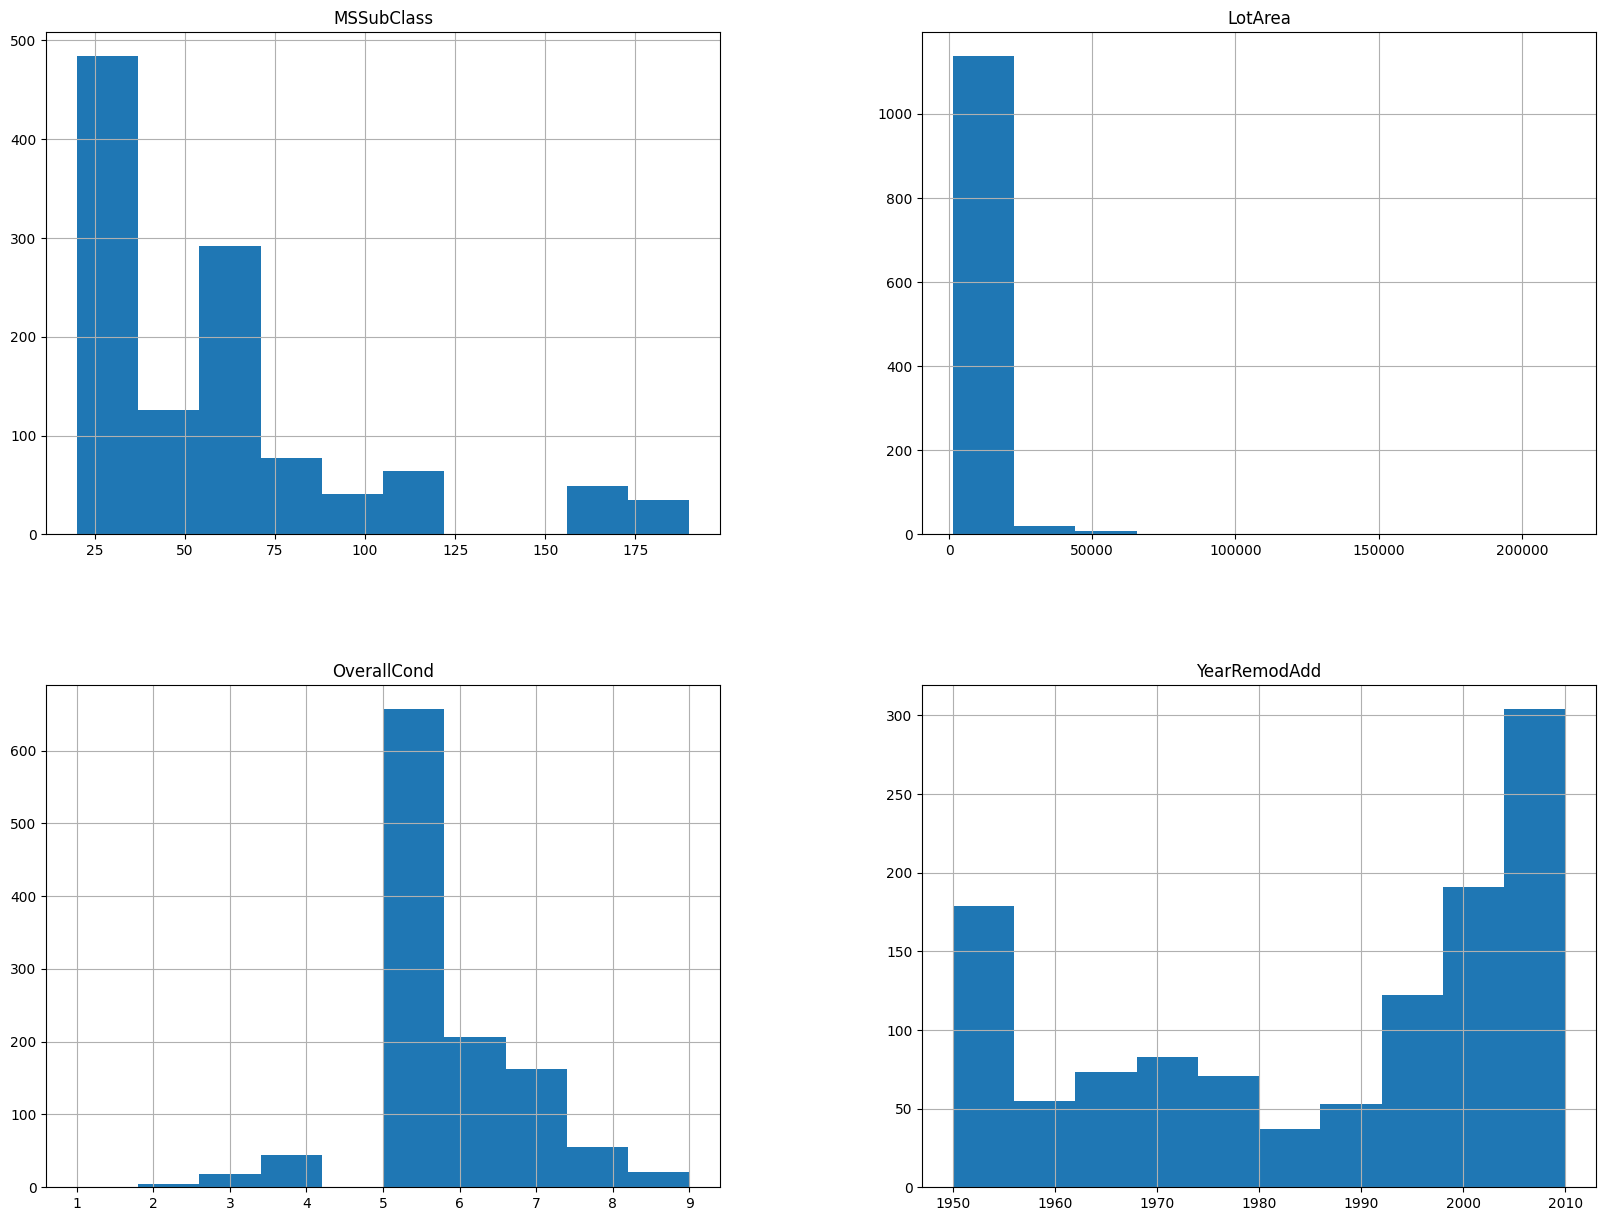

In [46]:
train_data.hist(figsize=(20,15))

<Axes: xlabel='MSSubClass', ylabel='LotArea'>

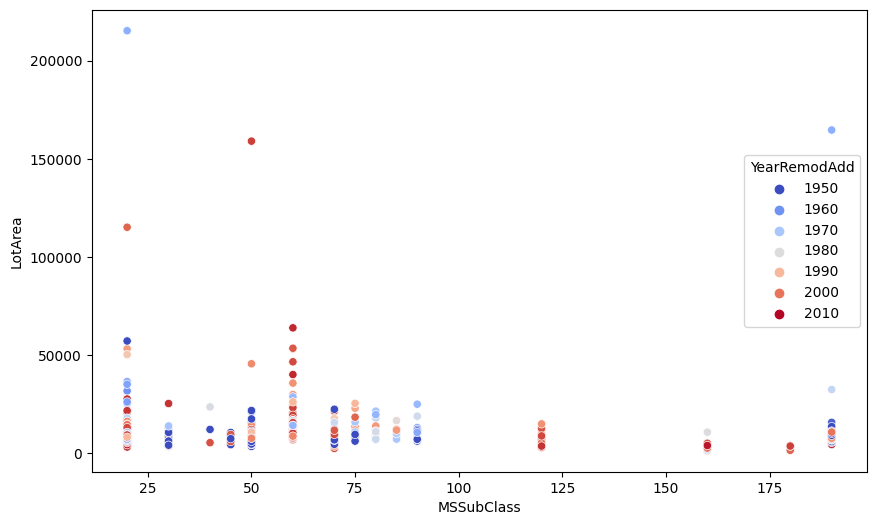

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="MSSubClass", y="LotArea", data=train_data, hue="YearRemodAdd", palette="coolwarm")

In [57]:
train_data['LotArea'] = np.log(train_data['LotArea']+1)



array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearRemodAdd'}>]], dtype=object)

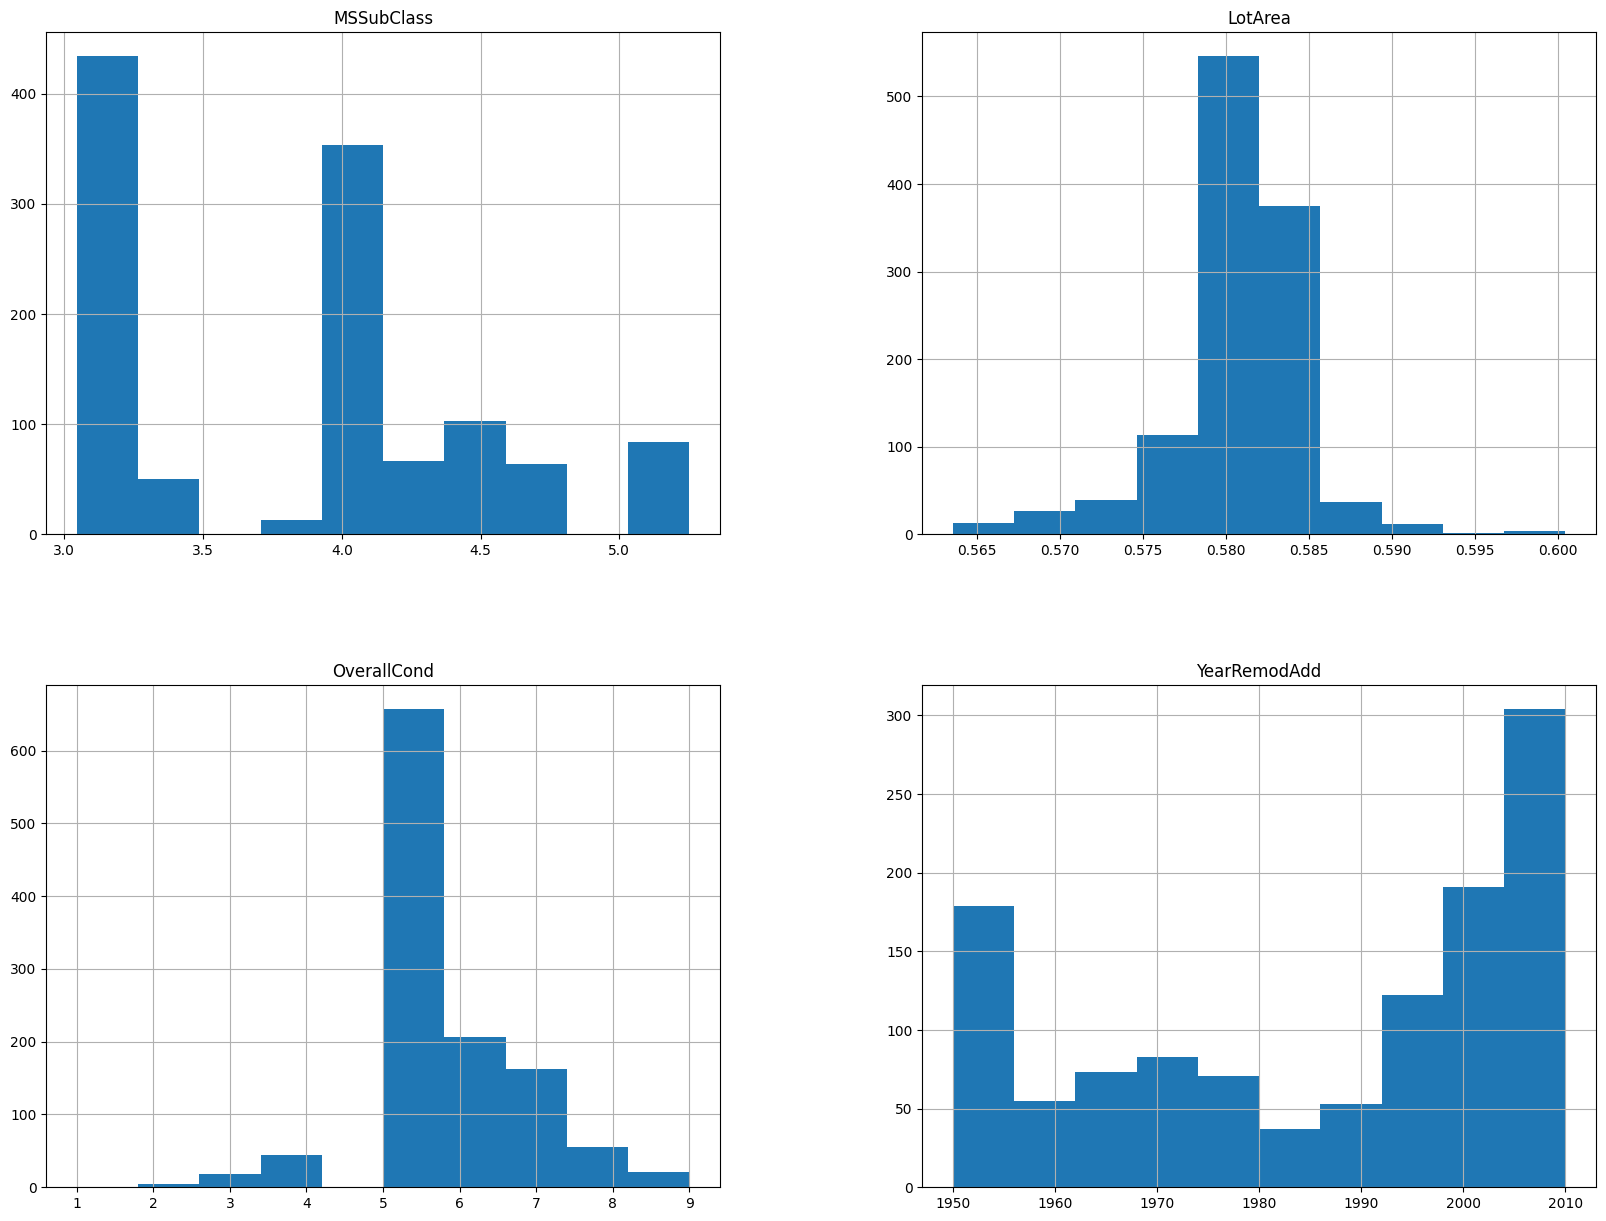

In [58]:
train_data.hist(figsize=(20,15))

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1168 non-null   float64
 1   MSZoning      1168 non-null   object 
 2   LotArea       1168 non-null   float64
 3   LotShape      1168 non-null   object 
 4   LandContour   1168 non-null   object 
 5   Utilities     1168 non-null   object 
 6   LotConfig     1168 non-null   object 
 7   Condition1    1168 non-null   object 
 8   BldgType      1168 non-null   object 
 9   OverallCond   1168 non-null   int64  
 10  YearRemodAdd  1168 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 141.8+ KB


In [60]:
train_data=train_data.join(pd.get_dummies(data.MSZoning)).drop(['MSZoning'],axis=1)

In [61]:
train_data=train_data.join(pd.get_dummies(data.LotShape)).drop(['LotShape'],axis=1)

In [62]:
train_data=train_data.join(pd.get_dummies(data.LandContour)).drop(['LandContour'],axis=1)

In [63]:
train_data=train_data.join(pd.get_dummies(data.Utilities)).drop(['Utilities'],axis=1)

In [64]:
train_data=train_data.join(pd.get_dummies(data.LotConfig)).drop(['LotConfig'],axis=1)

In [65]:
train_data=train_data.join(pd.get_dummies(data.Condition1)).drop(['Condition1'],axis=1)

In [66]:
train_data=train_data.join(pd.get_dummies(data.BldgType)).drop(['BldgType'],axis=1)

In [68]:
train_data=train_data.join(pd.get_dummies(data.OverallCond)).drop(['OverallCond'],axis=1)

<Axes: >

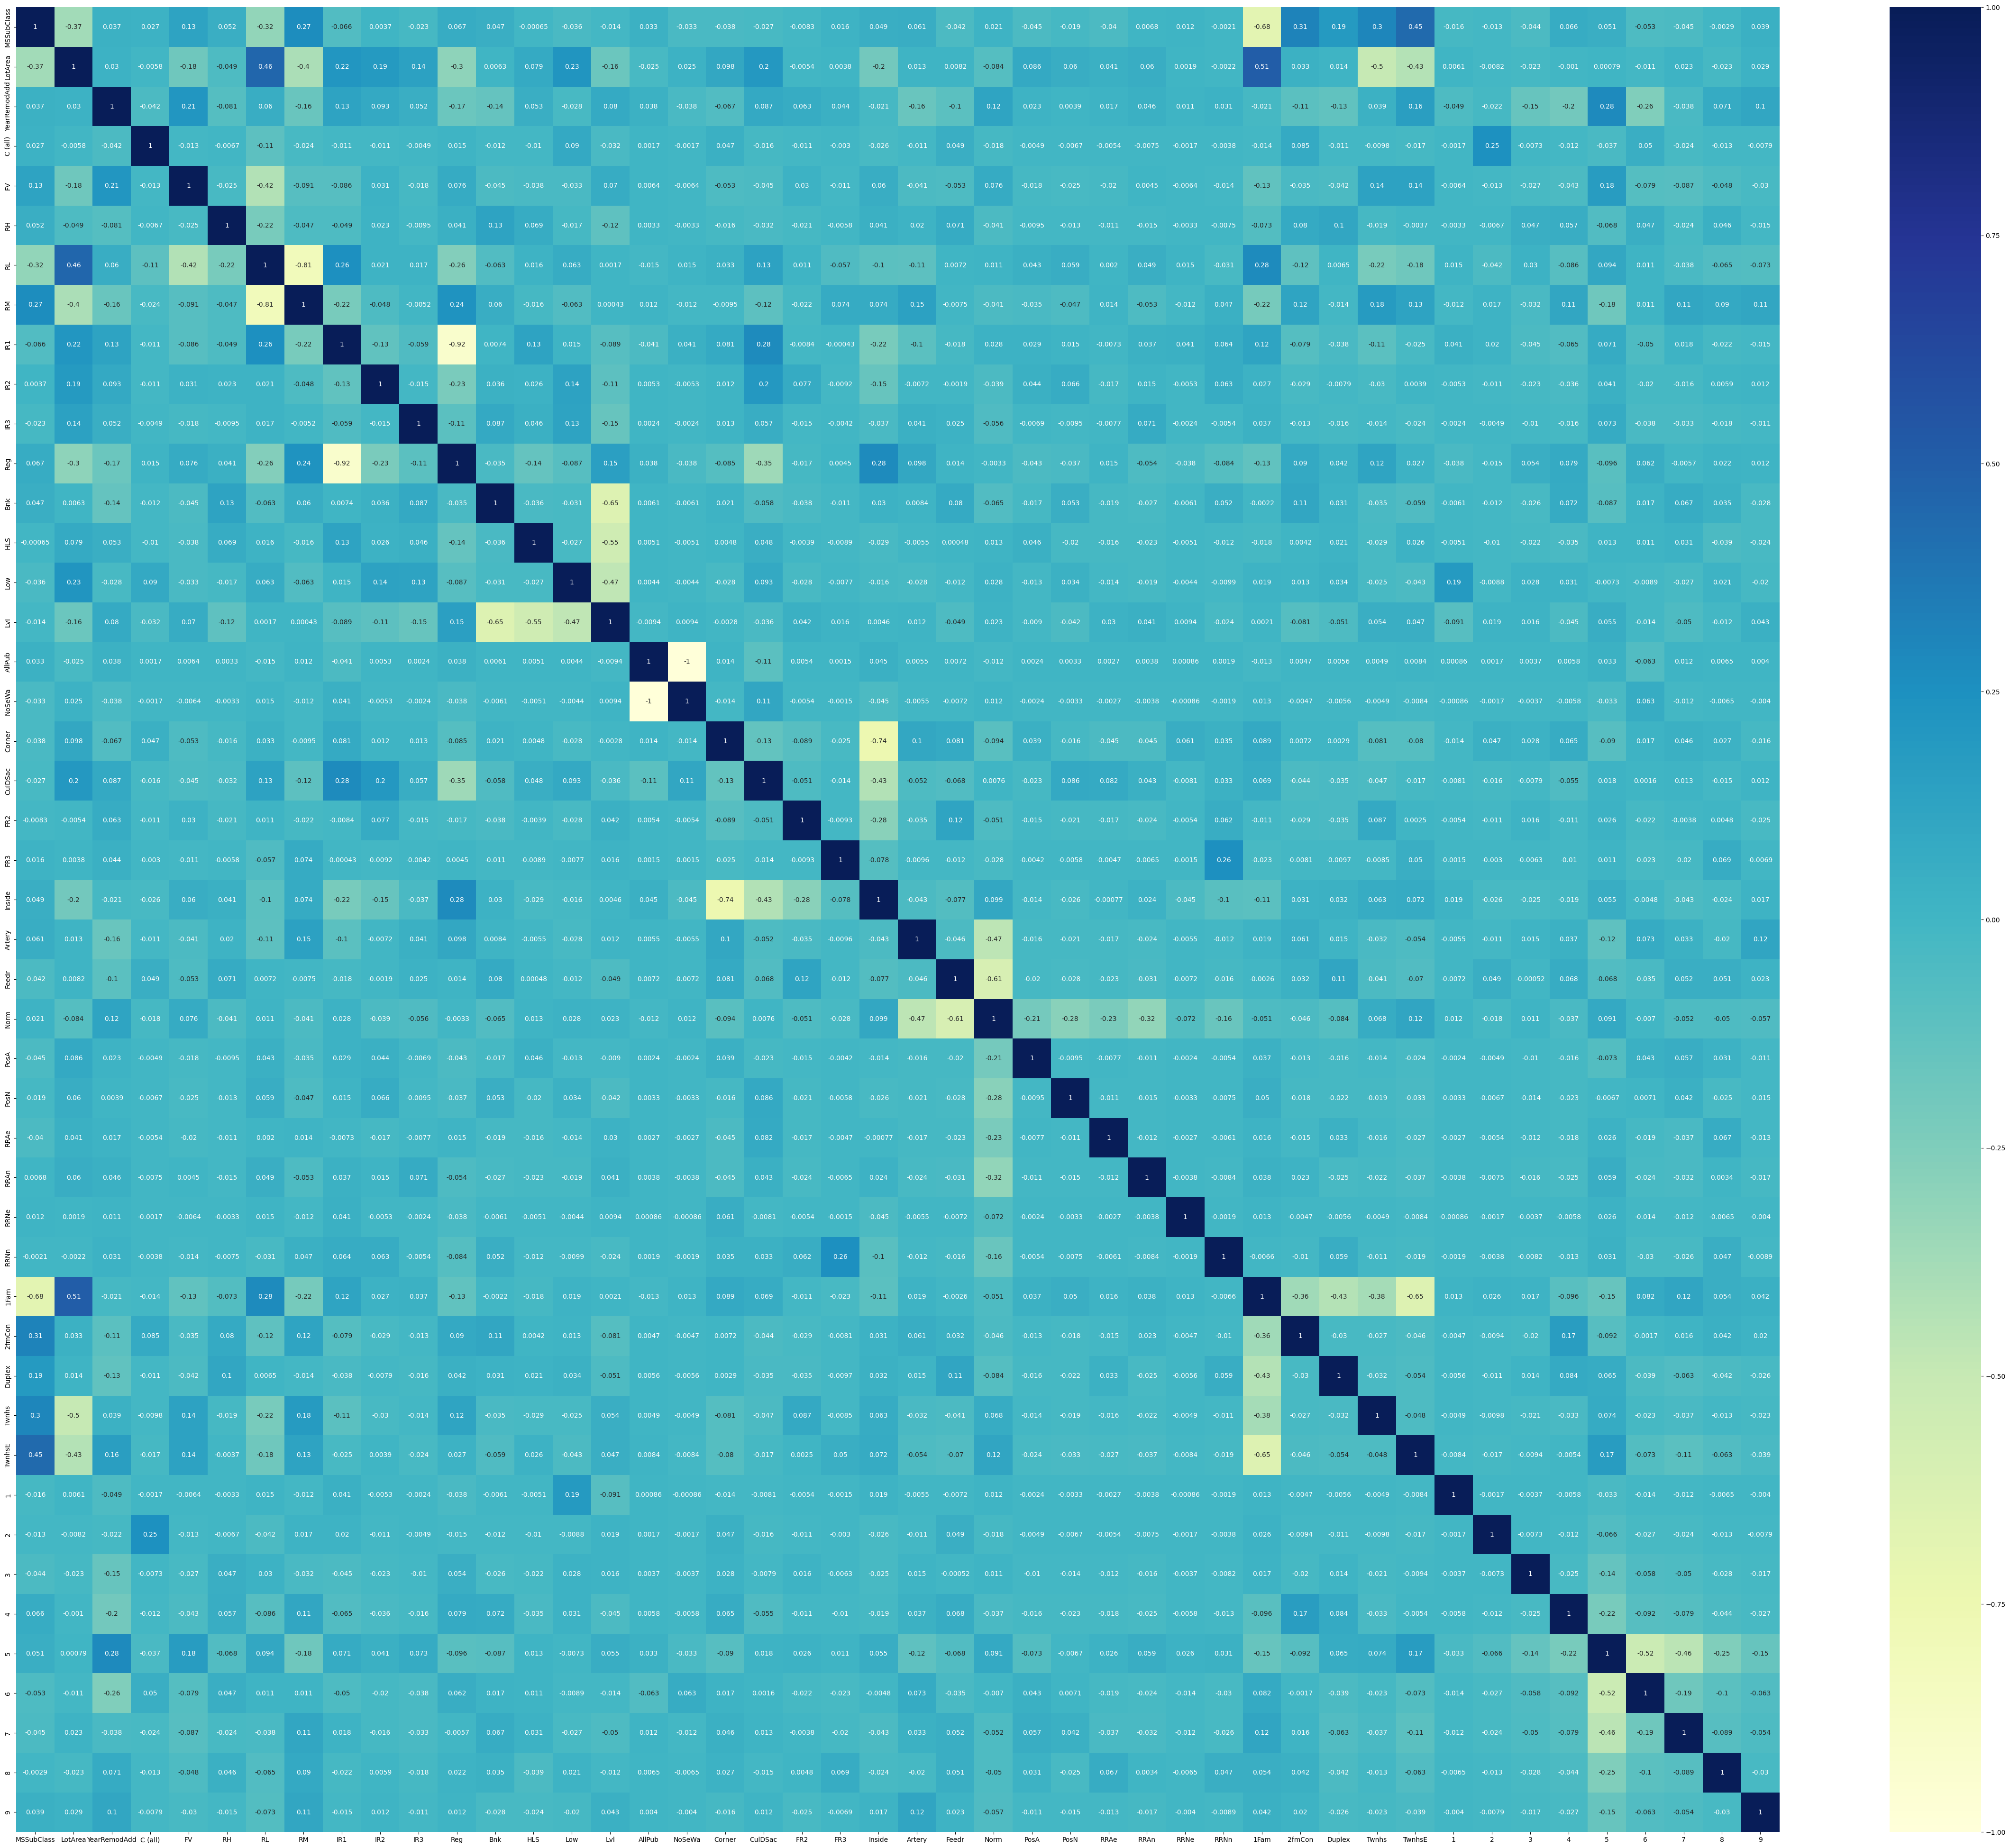

In [69]:
plt.figure(figsize=(60,50))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")